## Implementation of Polynomial Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv(r"C:\Users\Mohit\Downloads\Real estate.csv")
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [3]:
df.drop(columns="No",inplace=True)

In [4]:
columns=df.columns[:-1]
ans=[]
for i,j in zip(columns,list(range(1,7))):
    ans.append(i.removeprefix(f"X{j}").lstrip())
ans.append("Y house price of unit area".removeprefix("Y").lstrip())
print(ans)

['transaction date', 'house age', 'distance to the nearest MRT station', 'number of convenience stores', 'latitude', 'longitude', 'house price of unit area']


In [5]:
df.columns=ans   # if want to change all columns just write current columns=new columns array

In [6]:
df.head()

,transaction date,house age,distance to the nearest MRT station,number of convenience stores,latitude,longitude,house price of unit area
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [7]:
df.isnull().sum()

transaction date                       0
house age                              0
distance to the nearest MRT station    0
number of convenience stores           0
latitude                               0
longitude                              0
house price of unit area               0
dtype: int64

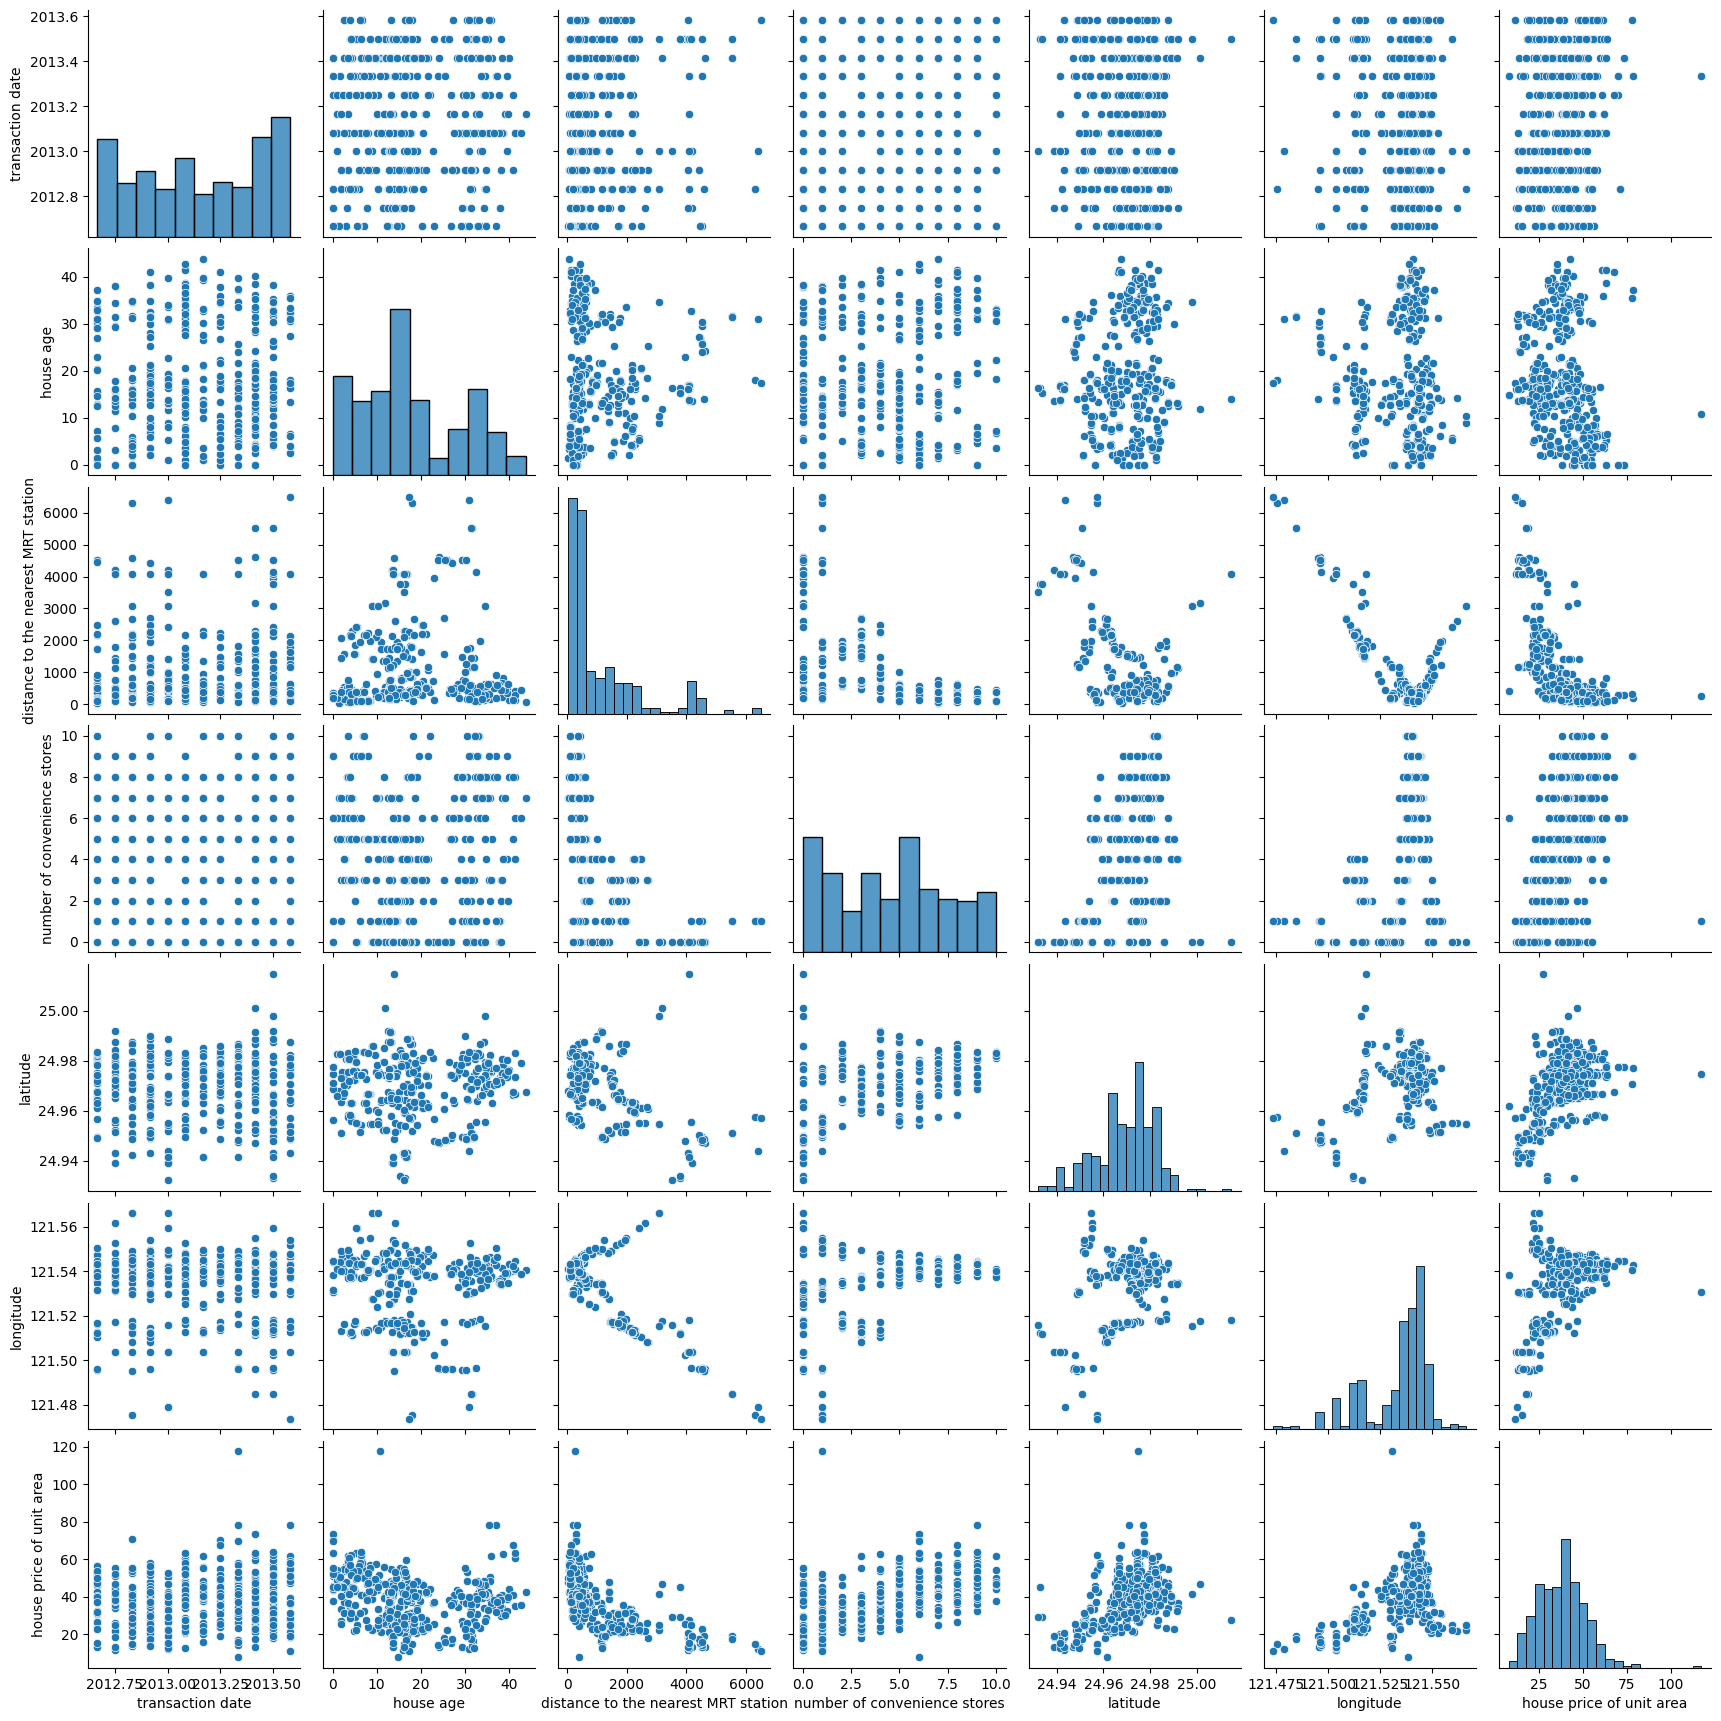

In [8]:
sns.pairplot(df)

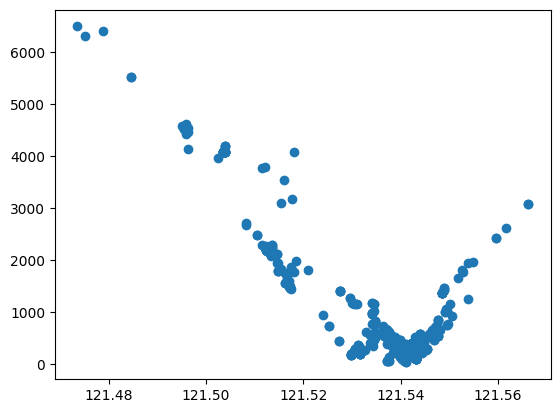

In [9]:
plt.scatter(df['longitude'],df['distance to the nearest MRT station'])

<Axes: >

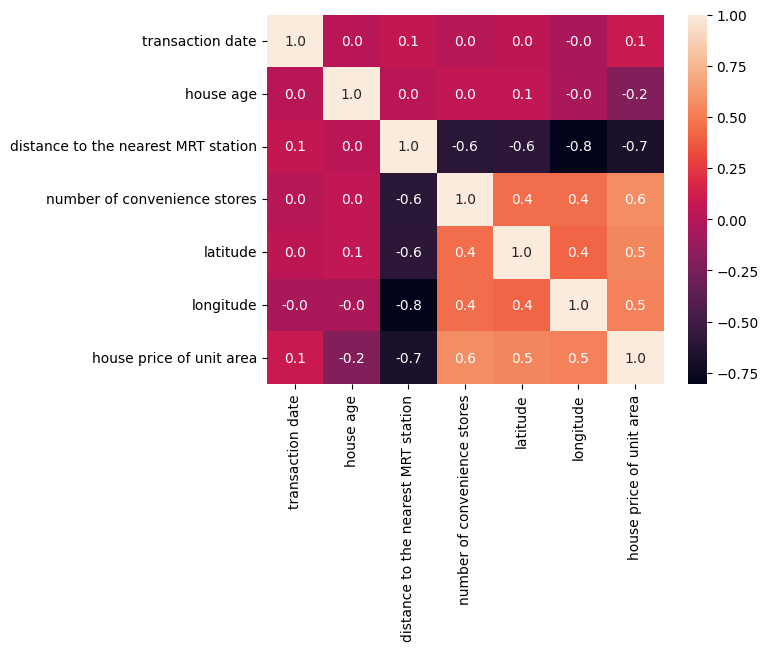

In [10]:
corr=df.corr()
sns.heatmap(corr,annot=True,fmt='.1f')

In [11]:
input_data_corr=df.iloc[:,:-1].corr()

<Axes: >

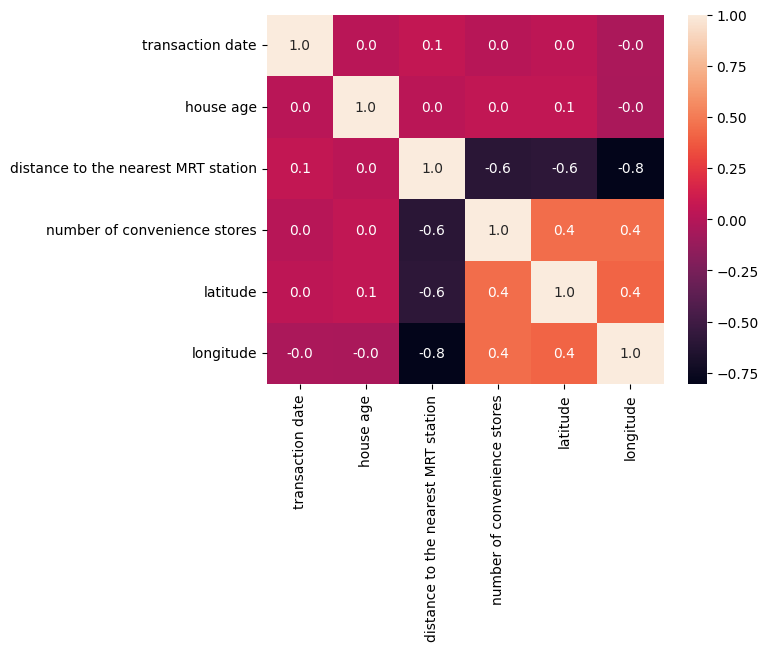

In [12]:
sns.heatmap(input_data_corr,annot=True,fmt=".1f")

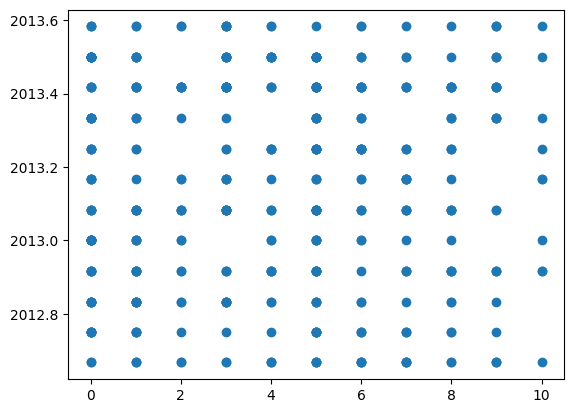

In [13]:
plt.scatter(df['number of convenience stores'],df['transaction date'])

<Axes: xlabel='distance to the nearest MRT station', ylabel='Density'>

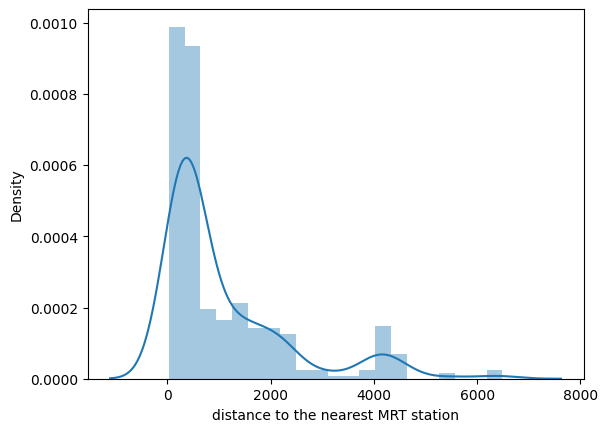

In [14]:
sns.distplot(df['distance to the nearest MRT station'])

<Axes: ylabel='distance to the nearest MRT station'>

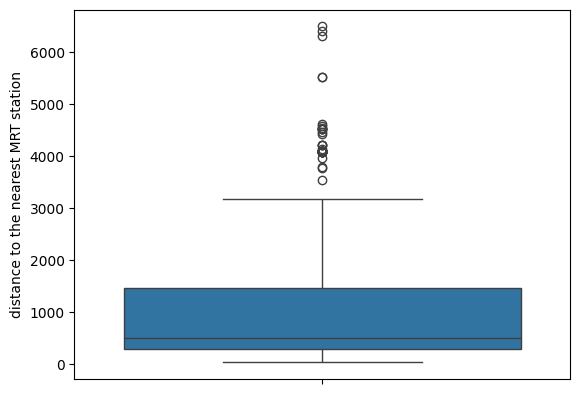

In [15]:
sns.boxplot(df['distance to the nearest MRT station'])

<Axes: ylabel='house age'>

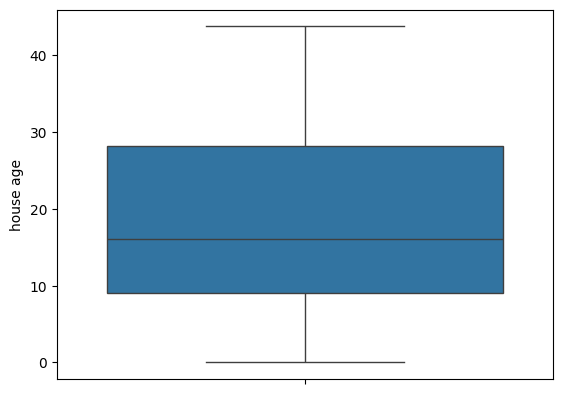

In [16]:
sns.boxplot(df['house age'])

In [17]:
df.dtypes

transaction date                       float64
house age                              float64
distance to the nearest MRT station    float64
number of convenience stores             int64
latitude                               float64
longitude                              float64
house price of unit area               float64
dtype: object

<Axes: xlabel='house age', ylabel='Density'>

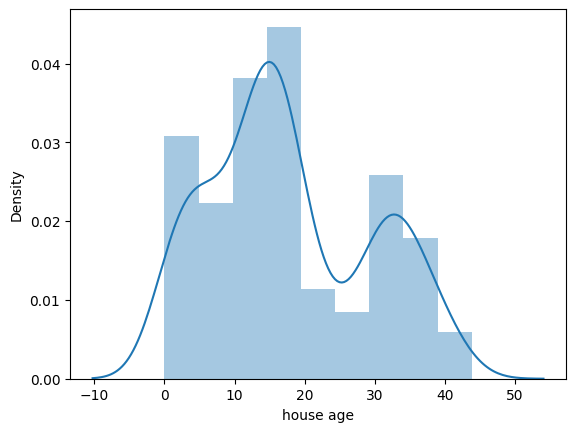

In [18]:
sns.distplot(df['house age'])

In [19]:
## it's showing   Data skewed nahi hai, lekin thoda irregular hai, matlab kuch groups dominate kar rahe hain.

In [20]:
df['house price of unit area'].corr(df['distance to the nearest MRT station'])

np.float64(-0.6736128553689185)

In [21]:
q1=df['distance to the nearest MRT station'].quantile(0.25)
q3=df['distance to the nearest MRT station'].quantile(0.75)
iqr=q3-q1
print(iqr)

1164.9542000000001


In [22]:
min_range=q1-(1.5*iqr)
max_range=q3+(1.5*iqr)
min_range,max_range

(np.float64(-1458.1065000000003), np.float64(3201.7103))

In [23]:
df=df[(df['distance to the nearest MRT station']<=max_range)]
# print(df.describe())

<Axes: ylabel='distance to the nearest MRT station'>

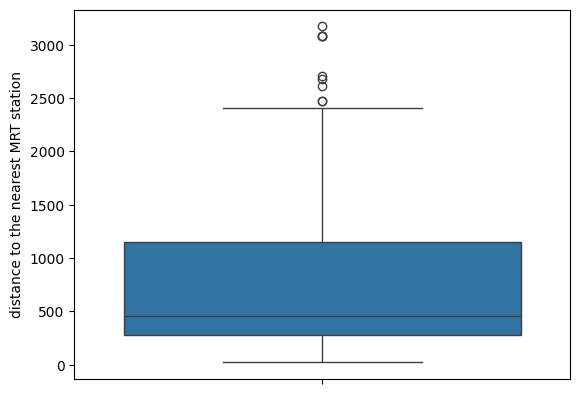

In [24]:
sns.boxplot(df['distance to the nearest MRT station'])

<Axes: xlabel='distance to the nearest MRT station', ylabel='Density'>

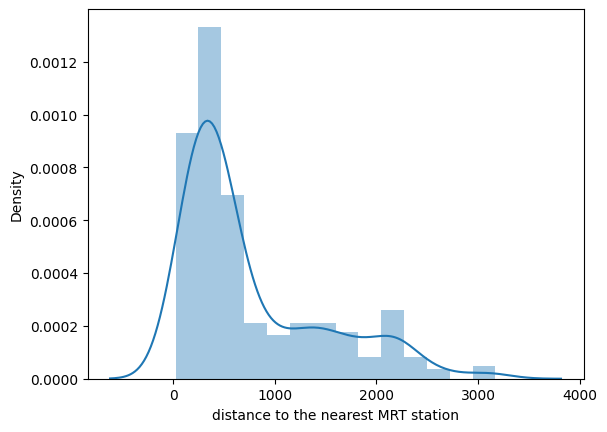

In [25]:
sns.distplot(df['distance to the nearest MRT station'])

In [26]:
df.shape

(377, 7)

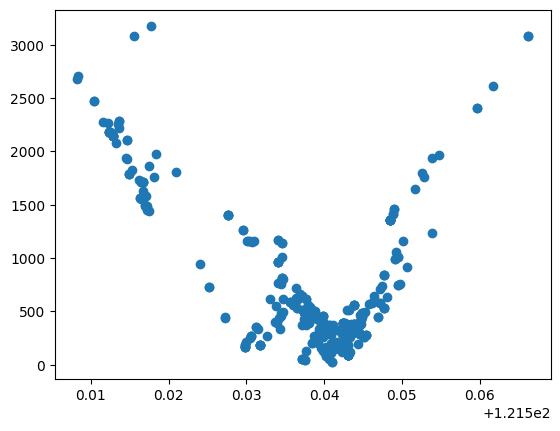

In [27]:
plt.scatter(df['longitude'],df['distance to the nearest MRT station'])

In [20]:
# function transformation
from sklearn.preprocessing import FunctionTransformer

In [21]:
trans=FunctionTransformer(lambda x:x**2,validate=False)
df['distance to the nearest MRT station']=trans.transform(df[['distance to the nearest MRT station']])

In [22]:
print(df['distance to the nearest MRT station'])

0      7.204414e+03
1      9.400031e+04
2      3.158266e+05
3      3.158266e+05
4      1.525437e+05
           ...     
408    4.733862e+06
410    8.182299e+03
411    1.528572e+05
412    1.098516e+04
413    8.182299e+03
Name: distance to the nearest MRT station, Length: 377, dtype: float64


<Axes: xlabel='distance to the nearest MRT station', ylabel='Density'>

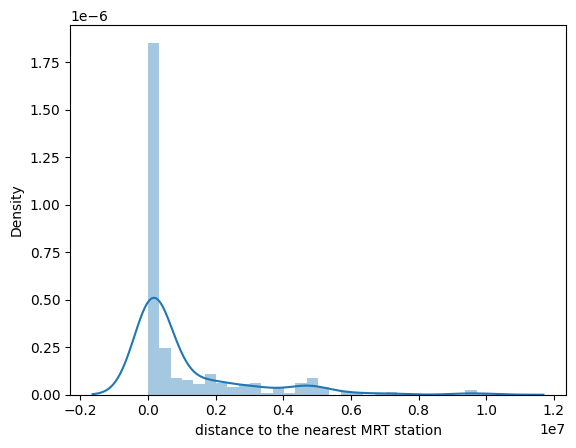

In [23]:
sns.distplot(df['distance to the nearest MRT station'])

In [24]:
df['distance to the nearest MRT station'].skew()

np.float64(2.340253310219405)

<Axes: ylabel='distance to the nearest MRT station'>

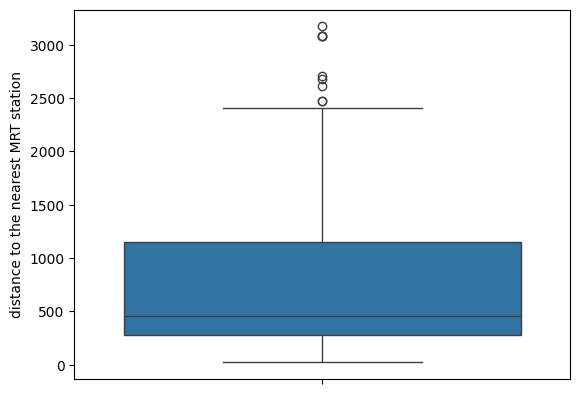

In [28]:
sns.boxplot(df['distance to the nearest MRT station'])

<Axes: xlabel='distance to the nearest MRT station', ylabel='Density'>

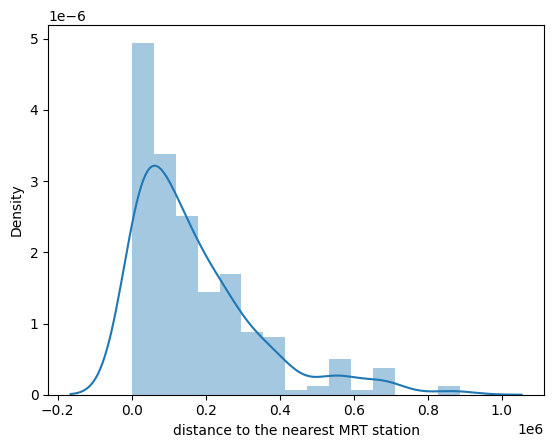

In [30]:
sns.distplot(df['distance to the nearest MRT station'])

In [30]:
print(df['distance to the nearest MRT station'].skew())

1.32031992718312


In [73]:
df.head()

,transaction date,house age,distance to the nearest MRT station,number of convenience stores,latitude,longitude,house price of unit area
0,2012.917,32.0,7204.414085,10,24.98298,121.54024,37.9
1,2012.917,19.5,94000.310068,9,24.98034,121.53951,42.2
2,2013.583,13.3,315826.578240,5,24.98746,121.54391,47.3
3,2013.500,13.3,315826.578240,5,24.98746,121.54391,54.8
4,2012.833,5.0,152543.675079,5,24.97937,121.54245,43.1


In [44]:
from sklearn.model_selection import train_test_split
# df.drop(columns=['latitude'],inplace=True)
df_copy=df
X=df_copy.iloc[:,:-1]
y=df_copy.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [45]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=2,include_bias=False)
X_train=poly.fit_transform(X_train)
X_test=poly.transform(X_test)

In [ ]:
# for trainging i am getting 0.59126153348216 and for test i am getting 0.58 

In [47]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [78]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import RidgeCV
from sklearn.pipeline import make_pipeline

# Polynomial -> Standardization -> Ridge Regression
model = make_pipeline(PolynomialFeatures(degree=2,include_bias=True), StandardScaler(), RidgeCV(alphas=0.001,scoring="r2",cv=None,gcv_mode="auto"))

model.fit(X_train, y_train)
print("Train Score:", model.score(X_train, y_train))
print("Test Score:", model.score(X_test, y_test))
y_pred=model.predict(X_test)
print(mean_absolute_error(y_pred,y_test))

Train Score: 0.6021812246856588
Test Score: 0.5968531329483495
5.114673441002749
